# Práctica Final de Machine Learning, Modelos Supervisados 

# Javier Gilabert Sabater

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

## Parte 1: Predicción de duración de viajes

### Pregunta 1: Realizar preprocesamiento de datos: imputar valores faltantes, transformar variables categóricas, estandarizar variables numéricas, etc. 

In [159]:
uber_examples = pd.read_csv('uber_time_examples.csv')
uber_examples.head(5)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,0,01-07 17:04:08,2,1.20,263,141,12.513054,297.430685,56.317405,405.20,0.408689,126.689773
1,1,03-02 17:41:40,1,0.88,246,68,6.256527,278.205127,27.160167,314.88,-0.256911,126.693467
2,2,02-17 12:15:00,3,7.61,24,13,18.769581,27.141964,5.192385,44.61,56.880789,126.615789
3,3,03-30 13:59:42,1,1.50,239,163,6.256527,270.288721,65.104518,403.50,1.218689,126.686311
4,4,02-14 18:26:55,1,1.20,142,229,6.256527,160.589952,91.465857,372.20,0.408689,126.689773


In [160]:
uber_labels = pd.read_csv('uber_time_labels.csv')
uber_labels.head(5)

,id,duration
0,0,455.0
1,1,413.0
2,2,1501.0
3,3,514.0
4,4,605.0


In [161]:
random_num = 1000
uber_df = pd.merge(uber_examples, uber_labels, on = 'id', how = 'left').sample(20000, random_state = random_num)
uber_df.head(5)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,duration
262820,262820,01-10 07:52:55,1,8.37,138,100,6.256527,156.066291,39.941422,246.37,69.025589,126.607017,2040.0
53184,53184,02-13 11:48:50,5,6.47,137,83,31.282635,154.935376,33.151380,226.47,40.829589,126.628947,1771.0
336054,336054,03-09 21:13:34,1,4.80,114,145,6.256527,128.924327,57.915062,263.80,22.008689,126.648222,1694.0
51332,51332,03-26 09:18:45,5,2.18,238,163,31.282635,269.157806,65.104518,403.18,3.721089,126.678462,685.0
176968,176968,02-01 14:38:33,1,1.60,151,142,6.256527,170.768188,56.716819,294.60,1.528689,126.685156,467.0


In [162]:
valores_faltantes = uber_df.isnull()

In [163]:
total_valores_faltantes_por_columna = valores_faltantes.sum()
total_valores_faltantes_por_columna

id            0
feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
duration      0
dtype: int64

In [164]:
uber_df.dtypes

id              int64
feature_0      object
feature_1       int64
feature_2     float64
feature_3       int64
feature_4       int64
feature_5     float64
feature_6     float64
feature_7     float64
feature_8     float64
feature_9     float64
feature_10    float64
duration      float64
dtype: object

In [165]:
uber_df.nunique()

id            20000
feature_0     19963
feature_1         7
feature_2      1483
feature_3       136
feature_4       216
feature_5         7
feature_6       136
feature_7       216
feature_8     11114
feature_9      1483
feature_10     1483
duration       2777
dtype: int64

In [166]:
uber_df['feature_1'].unique()

array([1, 5, 2, 4, 0, 3, 6])

In [167]:
uber_df['id'] = uber_df['id'].astype(str) 
# Cambiamos el feature 0 a formato tipo fecha
uber_df['feature_0'] = pd.to_datetime(uber_df['feature_0'], format='%m-%d %H:%M:%S') 
pd.DataFrame(uber_df.dtypes).T

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,duration
0,object,datetime64[ns],int64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64


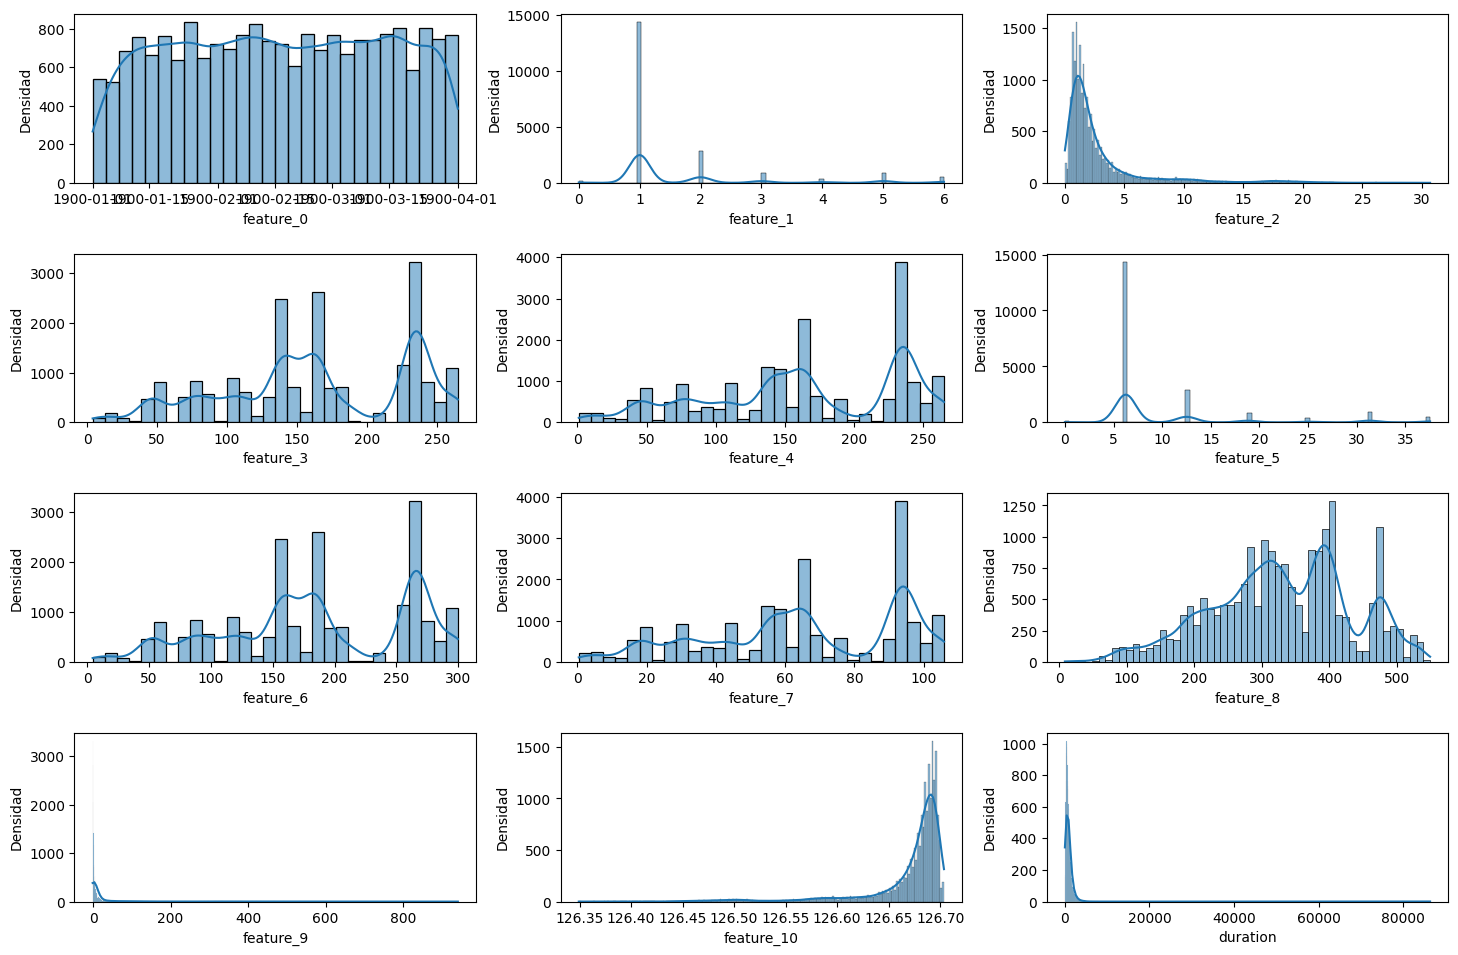

In [168]:
# Detección de variables con distribuciones significativamente anormales

variables = uber_df.drop('id', axis=1).columns
num_cols = 3
num_filas = (len(variables) - 1) // num_cols + 1
fig, axes = plt.subplots(num_filas, num_cols, figsize=(15, 10))
fig.tight_layout(pad=3)


for i, variable in enumerate(variables):
    fila = i // num_cols
    col = i % num_cols
    ax = axes[fila, col]
    sns.histplot(uber_df[variable], kde=True, ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel('Densidad')

plt.show()

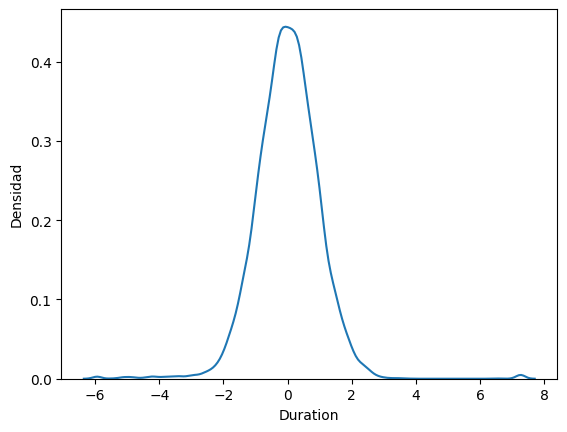

In [169]:
uber_df['duration'] = PowerTransformer(method='yeo-johnson').fit_transform(uber_df[['duration']])

sns.kdeplot(uber_df['duration'])
plt.xlabel('Duration')
plt.ylabel('Densidad')
plt.show()

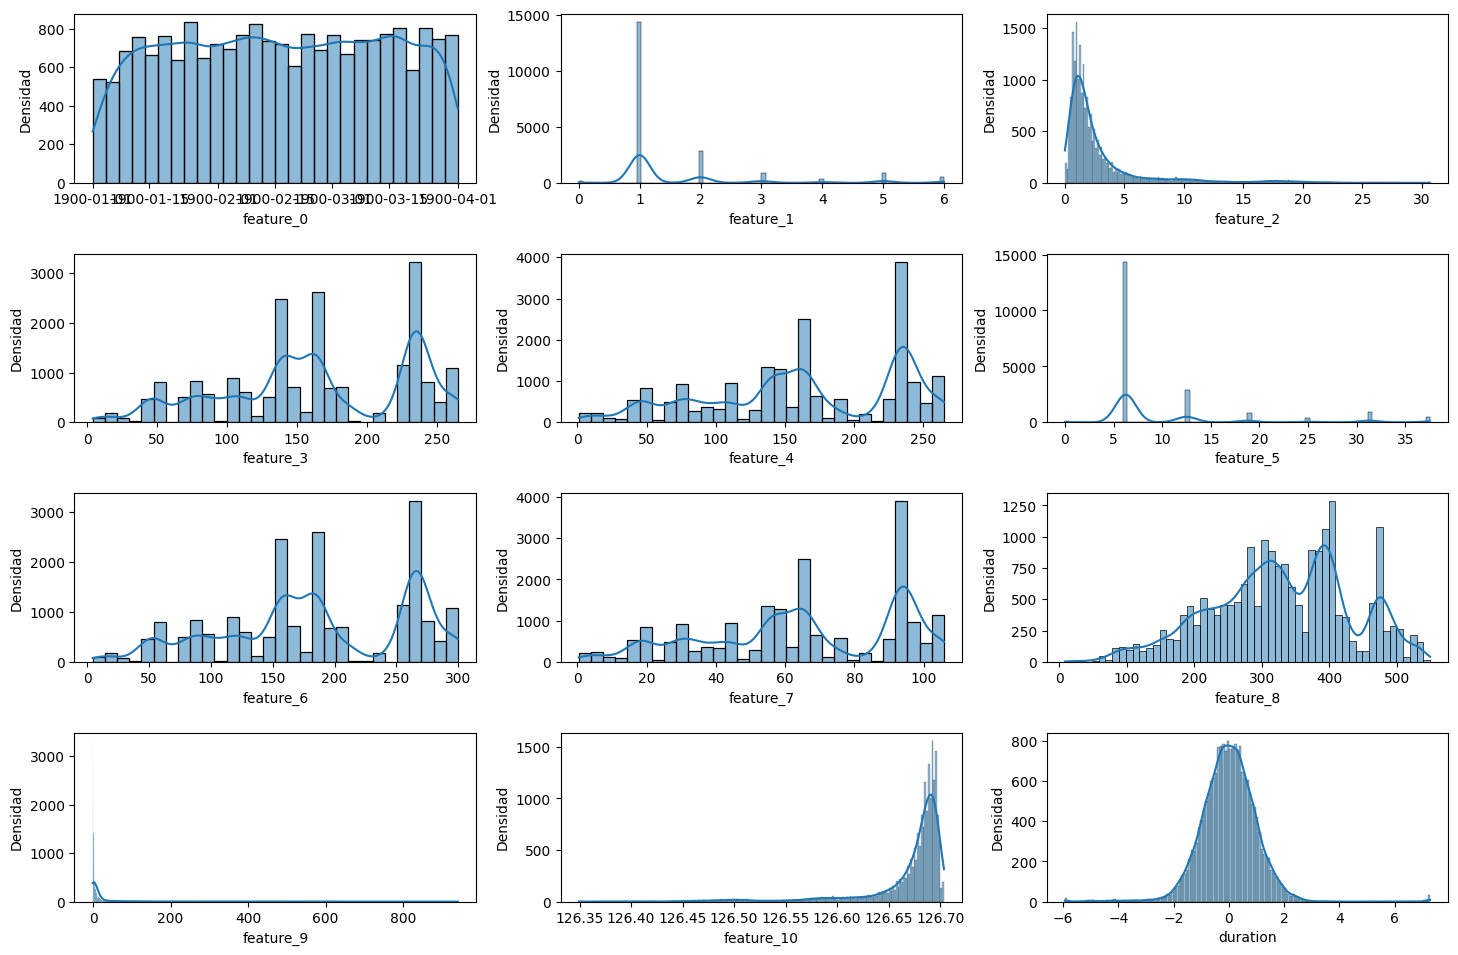

In [170]:
variables = uber_df.drop('id', axis=1).columns
num_cols = 3
num_filas = (len(variables) - 1) // num_cols + 1
fig, axes = plt.subplots(num_filas, num_cols, figsize=(15, 10))
fig.tight_layout(pad=3)


for i, variable in enumerate(variables):
    fila = i // num_cols
    col = i % num_cols
    ax = axes[fila, col]
    sns.histplot(uber_df[variable], kde=True, ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel('Densidad')

plt.show()


### Pregunta 2: Crear nuevas características (features) que puedan mejorar el poder predictivo del modelo.

In [171]:
uber_df['dia'] = pd.to_datetime(uber_df['feature_0']).dt.day
uber_df['mes'] = pd.to_datetime(uber_df['feature_0']).dt.month
uber_df['hora'] = pd.to_datetime(uber_df['feature_0']).dt.hour

In [172]:
uber_df = uber_df.drop(columns='feature_0')
uber_df.head(5)

,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,duration,dia,mes,hora
262820,262820,1,8.37,138,100,6.256527,156.066291,39.941422,246.37,69.025589,126.607017,1.469631,10,1,7
53184,53184,5,6.47,137,83,31.282635,154.935376,33.151380,226.47,40.829589,126.628947,1.284186,13,2,11
336054,336054,1,4.80,114,145,6.256527,128.924327,57.915062,263.80,22.008689,126.648222,1.226351,9,3,21
51332,51332,5,2.18,238,163,31.282635,269.157806,65.104518,403.18,3.721089,126.678462,0.094953,26,3,9
176968,176968,1,1.60,151,142,6.256527,170.768188,56.716819,294.60,1.528689,126.685156,-0.357851,1,2,14


### Pregunta 3: Seleccionar las características más relevantes para predecir la duración del viaje. 
- Utilizar técnicas de selección de características basadas en una sola variable o SelectFromModel. 
- Evitar Recursive feature elimination debido a su alto coste computacional.

In [173]:
uber_df_train, uber_df_test = train_test_split(uber_df, test_size = 0.3, random_state = random_num)

In [174]:
X_train = uber_df_train.drop(columns='duration')
y_train = uber_df_train['duration']
X_test = uber_df_test.drop(columns='duration')
y_test = uber_df_test['duration']

In [175]:
from sklearn.feature_selection import SelectKBest, f_regression

# Selección univariante de características
selector = SelectKBest(score_func=f_regression, k=6)  # Elige el número deseado de características
data_selected = selector.fit_transform(X_train,y_train)

# Obtener los índices de las características seleccionadas
selected_indices = selector.get_support(indices=True)
selected_features = uber_df.columns[selected_indices]

In [176]:
selected_features

Index(['feature_2', 'feature_4', 'feature_7', 'feature_8', 'feature_9',
       'feature_10'],
      dtype='object')

In [177]:
selected_indices

array([ 2,  4,  7,  8,  9, 10])

### Pregunta 4: Entrenar un modelo sencillo como base y medir su MAPE (Mean Absolute Percentage Error) en el conjunto de test. Luego, elegir y entrenar dos modelos más avanzados (por ejemplo, ensambladores, máquinas de soporte vectorial, modelos bayesianos, redes neuronales) y comparar sus MAPEs.

#### Arboles de decision

In [178]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=6)

In [179]:
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [180]:
dtree.score(X_train, y_train)

0.7003531296079709

In [181]:
dtree.score(X_test, y_test)

0.6602920071102774

### Pregunta 5: Optimizar los hiperparámetros de los dos últimos modelos utilizando validación cruzada (cross-validation) y comparar sus MAPEs. Elegir el mejor modelo basándose en estos resultados.

## Parte 2: Detección de emergencias en tweets

In [15]:
import tensorflow as tf
from InstructorEmbedding import INSTRUCTOR
model = INSTRUCTOR('hkunlp/instructor-large')

2023-06-07 16:02:06.529466: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/envs/umap/lib/python3.8/site-packages/InstructorEmbedding/instructor.py:7: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import trange


load INSTRUCTOR_Transformer
max_seq_length  512


### Pregunta 1: Extraer los embeddings del texto de los tweets utilizando un modelo pre-entrenado de Huggingface.

In [17]:
sentence = "3D ActionSLAM: wearable person tracking in multi-floor environments"
instruction = "Represent the Science title:"
embeddings = model.encode([[instruction,sentence]])
embeddings.shape

(1, 768)

In [16]:
twitter_df = pd.read_csv('twitter_emergency.csv')
twitter_df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [31]:
data_train, data_other = train_test_split(twitter_df, test_size =0.3, random_state = random_num)
data_test, data_val = train_test_split(data_other, test_size =0.5, random_state = random_num)

In [36]:
text_embeddings = [["Represent the twitter sentence for emergency classification: ", i] for i in data_train['text'].tolist()]

In [37]:
tweet_embeddings = model.encode(text_embeddings)

In [38]:
tweet_embeddings

array([[-0.04712407, -0.0286072 ,  0.0096882 , ..., -0.05024486,
         0.02724734,  0.03784241],
       [-0.01239631,  0.01167645,  0.00827684, ..., -0.02602164,
         0.0060405 ,  0.03105198],
       [-0.02913336, -0.00845989, -0.01166257, ..., -0.00955295,
         0.02874678,  0.05301156],
       ...,
       [-0.0530795 , -0.02966814, -0.02263394, ..., -0.05307033,
         0.02273952,  0.02846964],
       [-0.01564454,  0.00594493, -0.03348486, ..., -0.00795636,
         0.01505946,  0.06870234],
       [-0.05116648,  0.00096413, -0.01541272, ..., -0.03265489,
         0.01940241,  0.03798638]], dtype=float32)

In [39]:
import pickle

In [40]:
with open('Javier_embeddings.pkl', 'wb') as f:
    pickle.dump(tweet_embeddings, f)

In [45]:
test_text_embeddings = [["Represent the twitter sentence for emergency classification: ", i] for i in data_test['text'].tolist()]

In [46]:
test_tweet_embeddings = model.encode(test_text_embeddings)

In [47]:
test_tweet_embeddings

array([[-0.01149553, -0.00371701, -0.00898232, ..., -0.01619341,
         0.01232257,  0.04942939],
       [-0.02937691, -0.00190116,  0.0028574 , ..., -0.03616088,
         0.04910412,  0.05015436],
       [-0.05475243, -0.00526866, -0.02306421, ..., -0.04359387,
         0.025409  ,  0.07208053],
       ...,
       [-0.01126553, -0.01225763, -0.03359096, ..., -0.04861362,
        -0.02441198,  0.06548447],
       [-0.03165153, -0.00935586, -0.00646221, ..., -0.04972894,
         0.02163533,  0.07987393],
       [-0.0335225 , -0.00087935, -0.03134704, ..., -0.04984688,
         0.03869474,  0.05672879]], dtype=float32)

In [48]:
with open('Javier_test_embeddings.pkl', 'wb') as f:
    pickle.dump(test_tweet_embeddings, f)

### Pregunta 2: Crear y entrenar una pequeña red neuronal que utilice los embeddings, la palabra clave (keyword) y la ubicación (location) para predecir si un tweet está relacionado con una emergencia o no. Gestionar los valores faltantes y agrupar las variables categóricas de manera adecuada.

In [42]:
y = data_train['target']
y_test = data_test['target']

In [43]:
#Le indicamos cual es el formato de nuestra entrada. Cuantos nodos tiene
inputs = tf.keras.Input(shape=(tweet_embeddings.shape[1],))

# A partir de aquí vamos enlazando las capas, la salida de una con la entrada de otra
# en la propia definición de las capas podemos decir que función de activación usamos.
# La capa más común, y la que utilizaremos en este ejercicio son las que usa MLP, o Densas
# ya que conectan todos los nodos de entrada con los de salida

x = tf.keras.layers.Dense(254, activation="relu")(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(254, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)

# Por último, construimos nuestra capa de salida
x = tf.keras.layers.Dense(1)(x)
output = tf.keras.layers.Activation('sigmoid')(x)


In [49]:
model = tf.keras.Model(inputs, output)
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=tf.keras.metrics.AUC())

model.fit(tweet_embeddings,
          y, 
          epochs=100, 
          validation_data=(test_tweet_embeddings,y_test)
          )

Epoch 1/100
167/167 [==============================] - 4s 6ms/step - loss: 0.5260 - auc: 0.8102 - val_loss: 0.4105 - val_auc: 0.8919
Epoch 2/100
167/167 [==============================] - 1s 6ms/step - loss: 0.4386 - auc: 0.8701 - val_loss: 0.3971 - val_auc: 0.8921
Epoch 3/100
167/167 [==============================] - 1s 5ms/step - loss: 0.4161 - auc: 0.8823 - val_loss: 0.4197 - val_auc: 0.8912
Epoch 4/100
167/167 [==============================] - 1s 5ms/step - loss: 0.4057 - auc: 0.8867 - val_loss: 0.4016 - val_auc: 0.8902
Epoch 5/100
167/167 [==============================] - 1s 4ms/step - loss: 0.3999 - auc: 0.8904 - val_loss: 0.3946 - val_auc: 0.8903
Epoch 6/100
167/167 [==============================] - 1s 5ms/step - loss: 0.3943 - auc: 0.8927 - val_loss: 0.4045 - val_auc: 0.8901
Epoch 7/100
167/167 [==============================] - 1s 5ms/step - loss: 0.3811 - auc: 0.9003 - val_loss: 0.4002 - val_auc: 0.8895
Epoch 8/100
167/167 [==============================] - 1s 5ms/step - 

In [50]:
# Create accuracy metric
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model.predict(test_tweet_embeddings) > 0.5)

36/36 [==============================] - 0s 2ms/step


0.8152364273204904